<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8-Conrardy, Anthony**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I chose this dataset as it would sent to me in an email announcement for a machine learning competition on Kaggle.  The dataset comes in two (2) parts, a training set and a test set.  For the purposes of this assignment I will combine both sets and work with them as a union, rather than individually.  However, I will compare the two sets summary statistics to determine if they are indeed comparable for the purposes of the competition (i.e. are the sets equivalent).  The dataset contains the passengers on board the Titanic, indicating who survived and what some of the potential factors that contributed to survival or demise.

Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.  

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
train_url = 'https://raw.githubusercontent.com/Aconrard/DATA602/refs/heads/main/train.csv'
test_url = 'https://raw.githubusercontent.com/Aconrard/DATA602/refs/heads/main/test.csv'
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In this step we are going to join both the test and train datasets, while also maintaining where the source came from.  This will allow us to work with one single dataframe, but also perform comparison analysis of both the training and testing data.

In [2]:
train_df['source'] = 'train'
test_df['source'] = 'test'
titanic_df = pd.concat([train_df, test_df],ignore_index = True)
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB
None


In [3]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)
def calc_stats(df, group_by):
    return df.groupby(group_by).agg({
        'Sex':'count',
        'Age':['mean','median','std','count','min', 'max'],
        'Survived':['mean']
    }).rename(columns={'mean':'Mean','median':'Median','std':'Std Dev','count':'Count','min':'Min','max':'Max'})
train_stats = calc_stats(titanic_df[titanic_df['source'] == "train"],['Sex','Pclass'])
test_stats = calc_stats(titanic_df[titanic_df['source'] == "test"],['Sex','Pclass'])
train_stats['Survival Rate (%)'] = train_stats[('Survived', 'Mean')] * 100
overall_stats = calc_stats(titanic_df, ['Sex', 'Pclass'])
print(train_stats)
print(test_stats)
print(overall_stats)

def perform_t_tests(df):
    results = []
    categories = df.groupby(['Sex', 'Pclass'])
    
    for (sex, pclass), group in categories:
        train_ages = group[group['source'] == 'train']['Age'].dropna()
        test_ages = group[group['source'] == 'test']['Age'].dropna()
        
        if len(train_ages) > 1 and len(test_ages) > 1: 
            t_stat, p_val = stats.ttest_ind(train_ages, test_ages, equal_var=True)
            results.append((sex, pclass, t_stat, p_val))
        else:
            results.append((sex, pclass, None, None)) 
    
    return pd.DataFrame(results, columns=['Sex', 'Pclass', 'T-statistic', 'P-value'])

t_test_results = perform_t_tests(titanic_df)
print(t_test_results)

                Sex        Age                                      Survived  \
              Count       Mean Median    Std Dev Count   Min   Max      Mean   
Sex    Pclass                                                                  
female 1         94  34.611765   35.0  13.612052    85  2.00  63.0  0.968085   
       2         76  28.722973   28.0  12.872702    74  2.00  57.0  0.921053   
       3        144  21.750000   21.5  12.729964   102  0.75  63.0  0.500000   
male   1        122  41.281386   40.0  15.139570   101  0.92  80.0  0.368852   
       2        108  30.740707   30.0  14.793894    99  0.67  70.0  0.157407   
       3        347  26.507589   25.0  12.159514   253  0.42  74.0  0.135447   

              Survival Rate (%)  
                                 
Sex    Pclass                    
female 1              96.808511  
       2              92.105263  
       3              50.000000  
male   1              36.885246  
       2              15.740741  
       

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### Histogram Plot of Overall Age Distribution of the Entire Dataset

For the first plot we will look at the overall distribution of age over the entire dataset.  In this visualization we will set present a basic histogram plot of the distribution of ages based on 20 bins.  We will set the transparency of the color to 70% of the cyan ('c') color to make it more aesthetic to the eye, and to place a black line around each 'bar' to make it easier to discern. Chart title, x-axis, and y-axis labels are added with deafult values. A legend is not needed as this is a simple one factor histogram visualization which intent is more obvious.

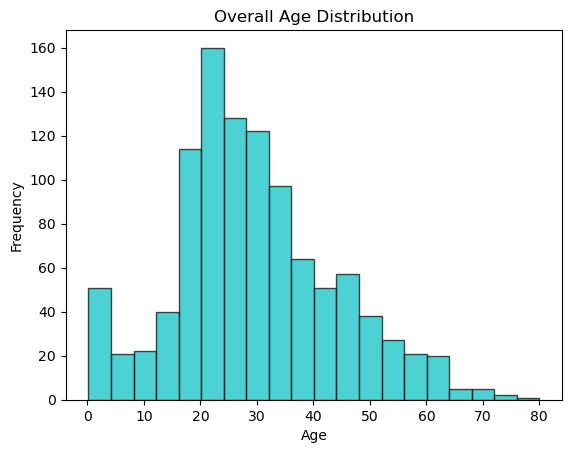

In [4]:
ages = titanic_df['Age'].dropna()
plt.hist(ages, bins=20, color='c', alpha=0.7, edgecolor='black')
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Histogram of Age Distribution by Sex

For this plot we will look at the histograms of age for both male a female passengers.  In this example we will use a for loop on the sex variable to identify the grouping for the histogram plot.  We ware chaning the opacity (alpha) of the plot to more easily discern the two groups of male and female passengers.  We are no also going to add a legend to identify each color in the visualization.

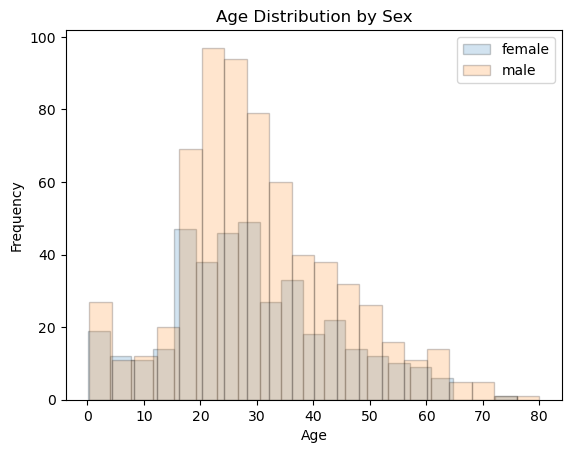

In [5]:
for sex, group in titanic_df.groupby('Sex'):
    plt.hist(group['Age'].dropna(), bins=20, alpha=0.2, label = sex, edgecolor='black')
    plt.title('Age Distribution by Sex')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

### Histogram of Age Distribution by Passenger Class

For this plot we will look at the histograms of age based upon passenger class.  In this visualization we are going to change the legend to explain the different passenger classes and to place a title within the legend.  However, while we can still discern where the higher distribution of ages occur, this type of plot may not be the best for our next visualization of passenger class, age group, and sex.

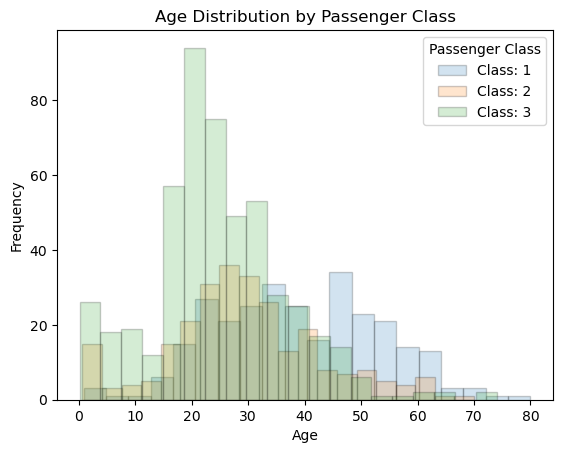

In [6]:
for Pclass, group in titanic_df.groupby('Pclass'):
    plt.hist(group['Age'].dropna(), bins=20, alpha=0.2, label=f'Class: {Pclass}', edgecolor='black')
    plt.title('Age Distribution by Passenger Class')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(title='Passenger Class')
plt.show()

### Bar Chart of Age Groups by Sex and Passenger Class

As we can see by the previous histogram things start to become complicated to discern what we are trying to investigate.  For the next plot we are going to switch to a simple stacked bar chart to present our analysis.  However, this requires that we alter our data a little to present.  First, we are going to identify the minimum and maximum ages of the passengers and then create evenly spaced bins for the ages.  We will then classify the counts for each of the bins based upon passenger class and sex.

In the visualization we will do the following:
1) Create a sequential display of the passenger class information.
2) Use a stacked bar chart to display the number of female and male passengers in the age category of the passenger class.
3) Change the font size of both the title and the labels to be larger and more readable.
4) Move the legend and change the font size to be more readable.
5) Rotate the x-axis labels 45 degrees to take up less space and more readable.
6) Use tight_layout to make sure labels and titles do not overlap.

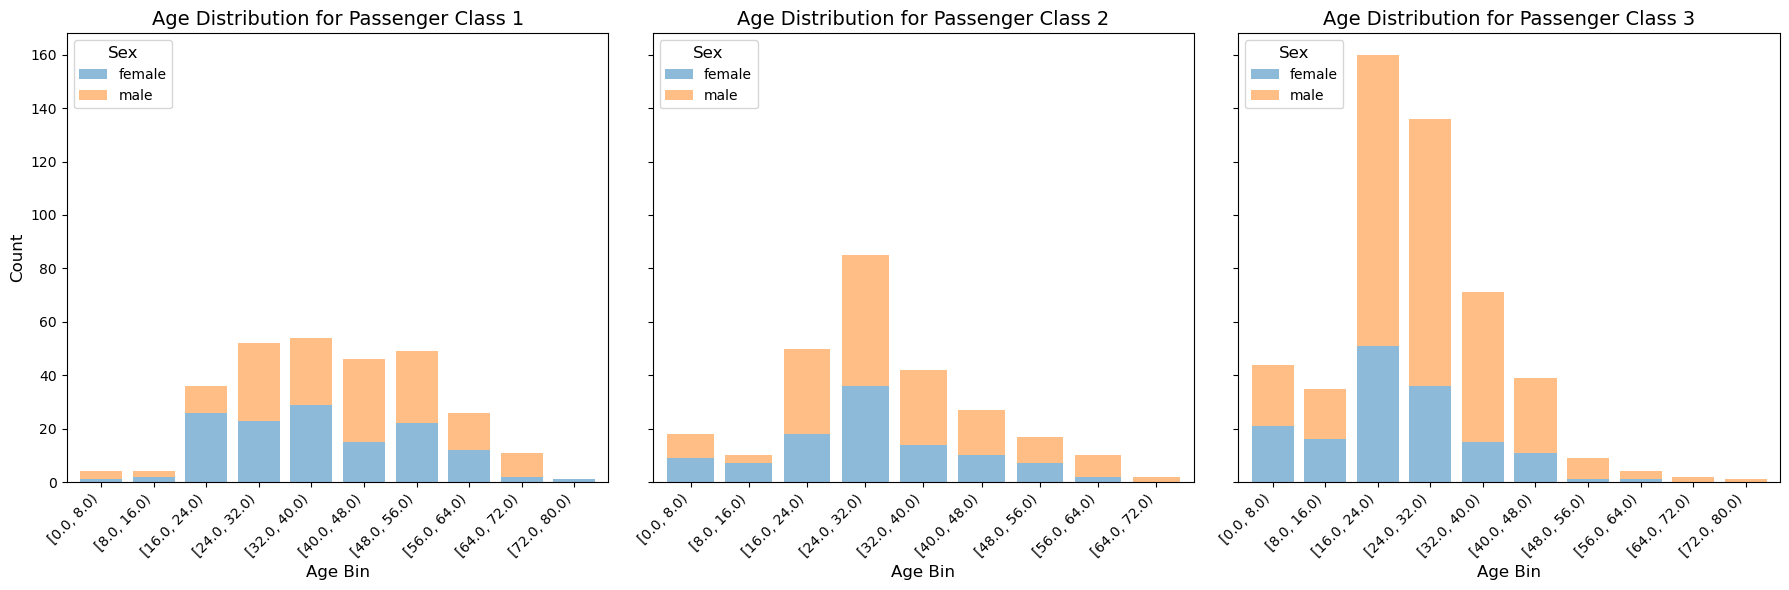

In [7]:
# Creating Age Bins
age_min = titanic_df['Age'].min()
age_max = titanic_df['Age'].max()
bins = np.linspace(age_min,age_max,11).round()
# Create the Age Bin column in dataframe and assign to row
titanic_df['Age_Bin']=pd.cut(titanic_df['Age'], bins=bins, include_lowest=True, right=False)

# Create new datafram with grouping on passenger class, age_bin and Sex
age_sex_class_counts = titanic_df.groupby(['Pclass', 'Age_Bin', 'Sex'], observed=True).size().unstack(fill_value=0)

# Set the subplot window and size.
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create the plots
for i, (pclass, data) in enumerate(age_sex_class_counts.groupby(level=0)):
    data = data.droplevel('Pclass')
    data.plot(kind='bar', stacked=True, ax=axes[i], width=0.8, alpha=0.5)
    axes[i].set_title(f'Age Distribution for Passenger Class {pclass}', fontsize=14)
    axes[i].set_xlabel('Age Bin', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Sex', loc='upper left', title_fontsize=12)
    axes[i].set_xticklabels([str(interval) for interval in data.index], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

In the first plot, we almost replicate the plot created with strictly the matplotlib library.  


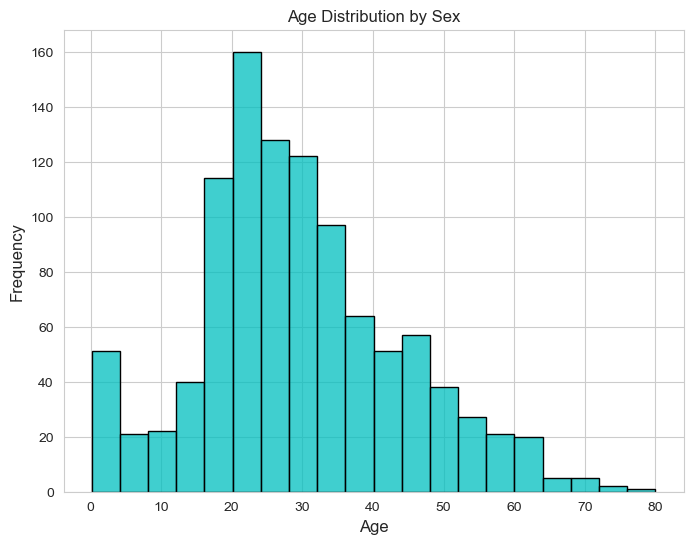

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.histplot(titanic_df['Age'].dropna(), bins=20, color='c', edgecolor='black')
plt.title('Age Distribution by Sex')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In the second plot, we can almost replicate the results of the matplotlib library. However, in this case the color for male is superimposed on top of the color for female, where it was the opposite in the first attempt. We have the option to shift the columns off each other by multiple = 'dodge' if we want to see them separately, but this is a better option for comparisons. Something noticeably different is that the bins are uniformly calculated for the different groups using the Seaborn Library, where the others were re-calculated for each group. So, the Seaborn Library clearly matches each bin to each column group.

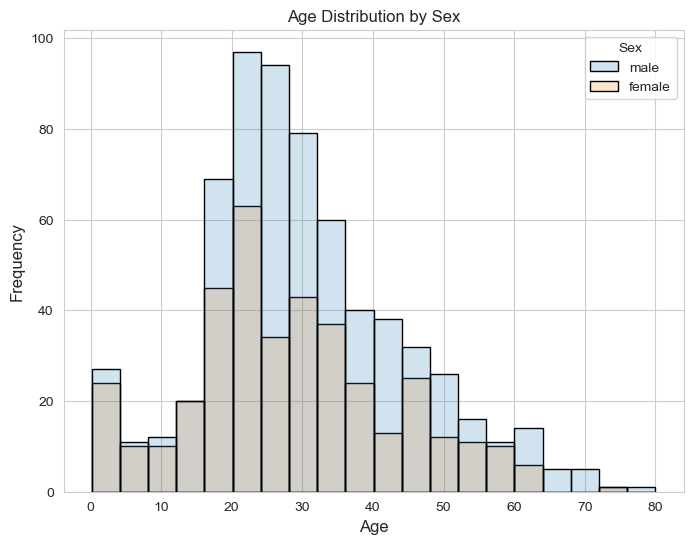

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.histplot(data=titanic_df, x='Age', hue='Sex', bins=20, alpha=0.2, edgecolor='black')
plt.title('Age Distribution by Sex')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In the third plot, we have similar results from the above with matching bins and columns. However, we needed to finesse the legend display more intently as it was automatically creating a legend for the passenger class that was difficult to edit to be more explanatory. In this case we had to edit the legend by calling it directly and making the changes.

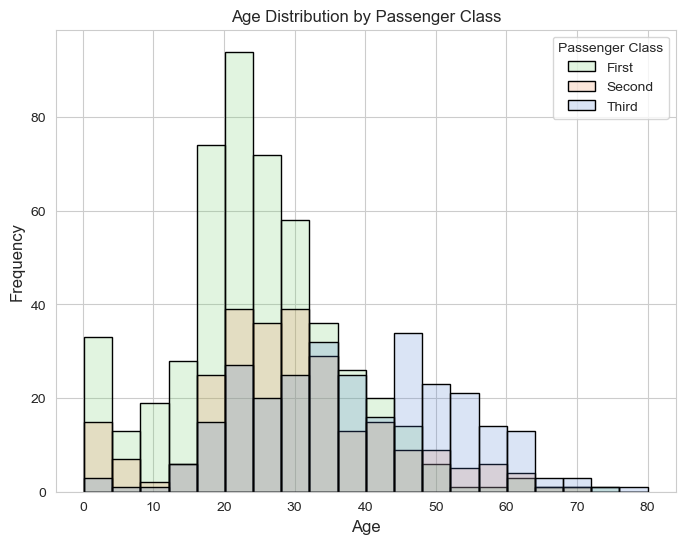

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
hist=sns.histplot(data=titanic_df, x='Age', hue='Pclass', bins=20, alpha=0.2, palette = 'muted', edgecolor='black')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
legend = plt.legend(['First', 'Second', 'Third'], title='Passenger Class')
legend.set_title('Passenger Class')
plt.show()

In this final plot we use the FacetGrid feature of Seaborn to create a similar visualization that we achieved with the matplotlib library.  Instead of creating three separate plots through a for loop, we use the FacetGrid method to separate out the different plots based upon the passenger class and presenting the counts of male and female passengers in each passenger class.  We shifted a central title to the center of the facet grid, created a new title for each of the facets, and placed a legend for sex at the bottom of the visualization.

<Figure size 800x600 with 0 Axes>

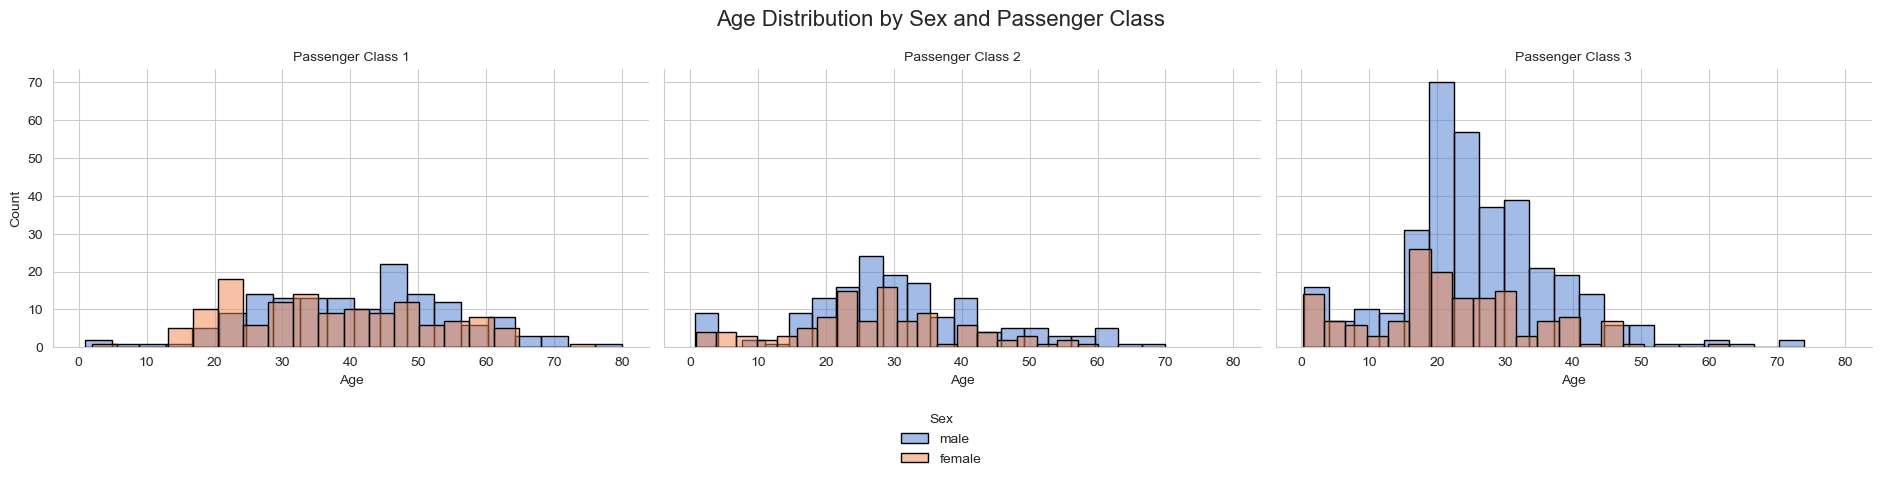

In [28]:
plt.figure(figsize=(8,6))
f_plot = sns.FacetGrid(titanic_df, col='Pclass', hue='Sex', height=4, aspect=1.5, palette='muted')
f_plot.map(sns.histplot, 'Age', bins=20, edgecolor='black',alpha=0.5)
f_plot.set_titles('Passenger Class {col_name}')
f_plot.add_legend(title='Sex', bbox_to_anchor = (0.5,0.0), loc='upper center')
f_plot.fig.suptitle('Age Distribution by Sex and Passenger Class', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Matplotlib and Seaborn offer distinct approaches to data visualization in Python. Matplotlib provides a low-level, highly customizable interface. This granular control allows you to tailor every aspect of a plot, from tick marks and fonts to lines and legends. However, this flexibility comes at the cost of more code; even simple additions like titles and axis labels require several lines of code. If you need to build a plot from scratch to meet specific design requirements, Matplotlib's control is the way to go.

Seaborn, built upon Matplotlib, offers a higher-level interface that simplifies the creation of visually appealing and complex plots. It streamlines the process by automating many details, such as color palettes, facet grids, and subplot layouts. For instance, creating faceted histograms based on categories like sex and passenger class is significantly easier with Seaborn, as it manages the arrangement and styling automatically. While you sacrifice some control, Seaborn's intelligent defaults and convenient functions make it ideal for quickly generating insightful visualizatios.
s.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.

This project analyzed the Titanic passenger dataset, originally designed for a machine learning competition and adapted for this assignment. Our focus was on comparing the consistency of the "test" and "train" datasets, specifically examining the age and sex distributions across passenger classes. While the scope of this analysis could have been broader, we concentrated on these key areas, yielding the following insights:

The "test" and "train" datasets demonstrated good consistency in terms of age and sex distribution across passenger classes, with the notable exception of female representation in first class. Unfortunately, the dataset documentation offered no explanation for this discrepancy.

Analyzing age distribution by sex revealed consistency with the overall age distribution, as confirmed by comparing histograms of the general passenger population with those stratified by sex.

The most compelling findings emerged from examining age distribution by passenger class. First class passengers exhibited a more uniform age distribution with a higher proportion of older individuals. Second class passengers displayed a more typical distribution, peaking around 27-30 years of age. Third class passengers were significantly younger, with an average age of approximately 25 and a large concentration of the youngest travelers. Furthermore, the third class had a substantial gender imbalance, with over twice as many males as females.